## **EDA: Análisis Exploratorio de los datos de concesión de préstamos**

### Primer apartado EDA: importación del dataset, selección de columnas y ajuste de formato de datos

Importación de las librerías a utilizar para el EDA.

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Importación del dataset, necesitamos encoding "latin1" ya que UTF no funciona.

In [61]:
df = pd.read_csv("Data/Anonymize_Loan_Default_data.csv", encoding="latin1")
df = df.iloc[:, 1:]  # elimino la columna "Unnamed: 0"


Vemos la estructura inicial del dataset

In [62]:
pd.set_option('display.max_columns', None)
df.head(15)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Dec-99,Charged Off,major_purchase,000xx,ZZ,0.00,0.0,Jan-01,0.0,NaN,0.0,0.0,0.0,0.00%,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,545583,703644,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,Aug-05,5.0,NaN,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,532101,687836,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Jun-10,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,Apr-94,1.0,59.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,877788,1092507,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Sep-11,Fully Paid,other,751xx,TX,10.80,3.0,Mar-98,3.0,3.0,7.0,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,875406,1089981,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,Jan-75,0.0,72.0,7.0,0.0,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0
5,506439,652909,3600.0,3600.0,3600.00000,36 months,10.25,116.59,10+ years,MORTGAGE,675048.0,Not Verified,Apr-10,Does not meet the credit policy. Status:Fully ...,other,352xx,AL,1.55,0.0,Apr-98,4.0,25.0,8.0,0.0,0.0,0%,25.0,4206.031191,4206.03,3600.00,606.03,May-13,146.75,Jun-13,Jun-16,0
6,981465,1204637,8000.0,8000.0,8000.00000,36 months,6.03,243.49,NaN,MORTGAGE,77736.0,Verified,Oct-11,Fully Paid,other,853xx,AZ,6.07,0.0,Jul-96,0.0,NaN,12.0,0.0,4182.0,13.60%,49.0,8724.971815,8724.97,8000.00,724.97,Apr-14,1423.66,NaN,Apr-14,0
7,749050,948200,6000.0,6000.0,6000.00000,36 months,7.49,186.61,3 years,RENT,35000.0,Not Verified,May-11,Fully Paid,debt_consolidation,658xx,MO,13.13,0.0,Oct-03,0.0,NaN,5.0,0.0,5864.0,47.70%,9.0,6717.950109,6717.95,6000.00,717.95,May-14,211.41,NaN,May-14,0
8,1016373,1243872,25600.0,25600.0,25472.82947,60 months,14.27,599.26,4 years,RENT,86000.0,Verified,Nov-11,Fully Paid,debt_consolidation,105xx,NY,26.51,0.0,Oct-83,1.0,NaN,16.0,0.0,33021.0,70.80%,32.0,32840.056740,32659.13,25600.00,7240.06,Apr-14,16083.78,NaN,Jun-16,0
9,786870,990345,19750.0,19750.0,19750.00000,60 months,23.22,559.27,10+ years,MORTGAGE,72500.0,Verified,Jun-11,Fully Paid,debt_consolidation,630xx,MO,19.96,0.0,Mar-92,0.0,61.0,15.0,0.0,21544.0,98.70%,44.0,27544.891160,27544.89,19750.00,7794.89,Jun-13,15264.34,NaN,Feb-16,0


Para mayor claridad, traducimos el nombre de las columnas al castellano.

In [63]:
# Cambiamos los nombres de las columnas a castellano para que sea mas entendible
df = df.rename(columns={
    "member_id": "id_cliente",
    "loan_amnt": "importe_prestamo",
    "funded_amnt": "importe_financiado",
    "funded_amnt_inv": "importe_inversores",
    "term": "plazo_meses",
    "int_rate": "tasa_interes",
    "installment": "cuota_mensual",
    "emp_length": "antiguedad_laboral",
    "home_ownership": "tipo_vivienda",
    "annual_inc": "ingreso_anual",
    "verification_status": "estado_verificacion",
    "issue_d": "fecha_emision",
    "loan_status": "estado_prestamo",
    "purpose": "proposito",
    "zip_code": "codigo_postal",
    "addr_state": "estado",
    "dti": "ratio_endeudamiento",
    "delinq_2yrs": "moras_ultimos_2_anos",
    "earliest_cr_line": "fecha_primera_linea_credito",
    "inq_last_6mths": "consultas_6_meses",
    "mths_since_last_delinq": "meses_desde_ultima_mora",
    "open_acc": "cuentas_abiertas",
    "pub_rec": "registros_publicos",
    "revol_bal": "saldo_rotativo",
    "revol_util": "utilizacion_rotativo",
    "total_acc": "total_cuentas",
    "total_pymnt": "total_pagado",
    "total_pymnt_inv": "total_pagado_inversor",
    "total_rec_prncp": "principal_recuperado",
    "total_rec_int": "intereses_recuperados",
    "last_pymnt_d": "fecha_ultimo_pago",
    "last_pymnt_amnt": "monto_ultimo_pago",
    "next_pymnt_d": "fecha_proximo_pago",
    "last_credit_pull_d": "fecha_revision_credito",
    "repay_fail": "impago"
})


Comprobamos si se han aplicado los cambios

In [64]:
df.columns

Index(['id', 'id_cliente', 'importe_prestamo', 'importe_financiado',
       'importe_inversores', 'plazo_meses', 'tasa_interes', 'cuota_mensual',
       'antiguedad_laboral', 'tipo_vivienda', 'ingreso_anual',
       'estado_verificacion', 'fecha_emision', 'estado_prestamo', 'proposito',
       'codigo_postal', 'estado', 'ratio_endeudamiento',
       'moras_ultimos_2_anos', 'fecha_primera_linea_credito',
       'consultas_6_meses', 'meses_desde_ultima_mora', 'cuentas_abiertas',
       'registros_publicos', 'saldo_rotativo', 'utilizacion_rotativo',
       'total_cuentas', 'total_pagado', 'total_pagado_inversor',
       'principal_recuperado', 'intereses_recuperados', 'fecha_ultimo_pago',
       'monto_ultimo_pago', 'fecha_proximo_pago', 'fecha_revision_credito',
       'impago'],
      dtype='object')

Vemos la forma del dataset

In [65]:
estructura_inicio = df.shape
estructura_inicio

(38480, 36)

Observamos que hay muchas columnas, y que muchas de ellas contienen datos que solo se conocen después de conceder el préstamo, y como el objetivo es predecir antes de la concesión de este, esas columnas pueden producir Data Leakage.
Hay que hacer limpieza y selección de columnas.

Vemos los valores nulos


In [66]:
# Tabla de valores NaN: conteo y porcentaje por columna
nulos = pd.DataFrame({
    "Nulos": df.isna().sum(),
    "Proporción": df.isna().mean() 
}).sort_values("Proporción", ascending=False)

nulos


,Nulos,Proporción
fecha_proximo_pago,35097,0.912084
meses_desde_ultima_mora,24363,0.633134
antiguedad_laboral,993,0.025806
fecha_ultimo_pago,71,0.001845
utilizacion_rotativo,59,0.001533
saldo_rotativo,4,0.000104
fecha_revision_credito,3,0.000078
ingreso_anual,2,0.000052
importe_inversores,1,0.000026
total_pagado_inversor,1,0.000026


Definimos la columna objetivo. Este será el target en nuestro modelo. Esta columna no se elimina para hacer el EDA ya que es una columna que aportará mucha información.

In [67]:
y = df["impago"]   # 0 = no impago, 1 = impago


Eliminamos las columnas que le den sobreinformación al modelo (leakage) o que sean posteriores al momento de petición del préstamo.

Las columnas que quedan para el EDA son:

- **id**: Identificador interno del préstamo, no aporta información útil.
- **importe_financiado**: decisión del banco tras evaluar la solvencia del cliente. Como deriva de un proceso de análisis posterior a la solicitud, introduce conocimiento del futuro.
- **importe_inversores**: depende de cuánto deciden aportar los inversores una vez revisan el préstamo. 
- **id_cliente**: Identificador del cliente; el modelo no debe aprender esta información
- **estado_prestamo**: Estado final del préstamo; revela el resultado real al modelo
- **total_pagado**: Total pagado al final; depende del comportamiento futuro del cliente.
- **total_pagado_inversor**: Total pagado al inversor; información posterior al préstamo.
- **principal_recuperado**: Principal recuperado; refleja pagos reales ya ocurridos.
- **intereses_recuperados**: Intereses recuperados; también es información posterior.
- **fecha_ultimo_pago**: Fecha del último pago; solo se conoce después del préstamo.
- **monto_ultimo_pago**: Monto del último pago; indica si pagó o no, el modelo no debe aprender esta información
- **fecha_proximo_pago**: Próxima fecha de pago; no está disponible en el momento de la solicitud.
- **fecha_revision_credito**: Última fecha de revisión del crédito; puede ocurrir tras la emisión del préstamo.
- **codigo_postal**: Código postal truncado, aporta poca información y añade ruido.
- **cuota_mensual**: es la combinación de importe_prestamo, plazo_meses y tasa_interes.

In [68]:
columnas_a_eliminar = [
    "id",
    "id_cliente",
    "importe_financiado",
    "importe_inversores",
    "estado_prestamo",
    "total_pagado",
    "total_pagado_inversor",
    "principal_recuperado",
    "intereses_recuperados",
    "fecha_ultimo_pago",
    "monto_ultimo_pago",
    "fecha_proximo_pago",
    "fecha_revision_credito",
    "codigo_postal",
    "cuota_mensual"
]

df = df.drop(columns=columnas_a_eliminar)



Nueva forma del dataset tras la limpieza de los datos:

In [69]:
estructura_final = df.shape
print(estructura_final)

porc_columnas_eliminadas = (estructura_inicio[1] - estructura_final[1]) / estructura_inicio[1] * 100
print("Porcentaje de columnas eliminadas: ", round(porc_columnas_eliminadas, 2), "%")

(38480, 21)
Porcentaje de columnas eliminadas:  41.67 %


Una vez eliminadas las columnas no necesarias hay que limpiar las que tienen datos en formatos inválidos

- **utilizacion_rotativo**: Porcentaje de utilización del crédito rotativo; viene con el signo % y también con caracteres extraños,por lo que debe limpiarse antes de convertirlo a un valor numérico.
- **antiguedad_laboral**: Antigüedad laboral del solicitante; está escrita en texto (“< 1 year”, “10+ years”, “4 years”),por lo que hay que extraer el número y convertirlo a formato numérico.
- **fecha_emision y fecha_primera_linea_credito**: Fechas del tipo “Dec-99” o “Jan-01” que vienen como texto; deben convertirse a formato datetime para poder trabajar con ellas.
- **tasa_interes**: Tipo de interés del préstamo; aparece expresado como texto con el símbolo %, lo que impide usarlo como número hasta limpiar el carácter %.
- **plazo_meses**: Duración del préstamo (“36 months”, “60 months”); es texto y debe extraerse el valor numérico de los meses.
meses_desde_ultima_mora**: Meses desde la última morosidad; contiene valores escritos como texto en vez de números, por lo que hay que convertirlos a numérico.
- **saldo_rotativo**: "Balance revolvente"; puede aparecer como texto en algunos registros, por lo que debe convertirse a dato numérico después de limpiar el formato.

Limpieza de números

In [70]:
columnas_a_limpiarse = ["utilizacion_rotativo", "tasa_interes", "plazo_meses", "meses_desde_ultima_mora", "saldo_rotativo"]

def solo_numeros_y_punto(valor):
    valor = str(valor)
    permitido = ["0","1","2","3","4","5","6","7","8","9","."]
    limpio = ""
    for i in valor:
        if i in permitido:
            limpio += i
    return limpio


# Aplicar limpieza a las columnas
for col in columnas_a_limpiarse:
    df[col] = df[col].astype(str).apply(solo_numeros_y_punto)
    df[col] = pd.to_numeric(df[col], errors="coerce")


Limpieza de fechas

In [71]:
df["fecha_emision"] = pd.to_datetime(df["fecha_emision"], format="%b-%y", errors="coerce")
df["fecha_primera_linea_credito"] = pd.to_datetime(df["fecha_primera_linea_credito"], format="%b-%y", errors="coerce")


Revisamos el dataframe final tras la limpieza y selección de columnas

In [72]:
df.head(15)

,importe_prestamo,plazo_meses,tasa_interes,antiguedad_laboral,tipo_vivienda,ingreso_anual,estado_verificacion,fecha_emision,proposito,estado,ratio_endeudamiento,moras_ultimos_2_anos,fecha_primera_linea_credito,consultas_6_meses,meses_desde_ultima_mora,cuentas_abiertas,registros_publicos,saldo_rotativo,utilizacion_rotativo,total_cuentas,impago
0,0.0,36,0.00,< 1 year,RENT,0.0,Not Verified,1999-12-01,major_purchase,ZZ,0.00,0.0,2001-01-01,0.0,NaN,0.0,0.0,0.0,0.00,1.0,1
1,2500.0,36,13.98,4 years,RENT,20004.0,Not Verified,2010-07-01,other,MI,19.86,0.0,2005-08-01,5.0,NaN,7.0,0.0,981.0,21.30,10.0,0
2,5000.0,36,15.95,4 years,RENT,59000.0,Not Verified,2010-06-01,debt_consolidation,NY,19.57,0.0,1994-04-01,1.0,59.0,7.0,0.0,18773.0,99.90,15.0,1
3,7000.0,36,9.91,10+ years,MORTGAGE,53796.0,Not Verified,2011-09-01,other,TX,10.80,3.0,1998-03-01,3.0,3.0,7.0,0.0,3269.0,47.20,20.0,0
4,2000.0,36,5.42,10+ years,RENT,30000.0,Not Verified,2011-09-01,debt_consolidation,NY,3.60,0.0,1975-01-01,0.0,72.0,7.0,0.0,0.0,0.00,15.0,0
5,3600.0,36,10.25,10+ years,MORTGAGE,675048.0,Not Verified,2010-04-01,other,AL,1.55,0.0,1998-04-01,4.0,25.0,8.0,0.0,0.0,0.00,25.0,0
6,8000.0,36,6.03,NaN,MORTGAGE,77736.0,Verified,2011-10-01,other,AZ,6.07,0.0,1996-07-01,0.0,NaN,12.0,0.0,4182.0,13.60,49.0,0
7,6000.0,36,7.49,3 years,RENT,35000.0,Not Verified,2011-05-01,debt_consolidation,MO,13.13,0.0,2003-10-01,0.0,NaN,5.0,0.0,5864.0,47.70,9.0,0
8,25600.0,60,14.27,4 years,RENT,86000.0,Verified,2011-11-01,debt_consolidation,NY,26.51,0.0,1983-10-01,1.0,NaN,16.0,0.0,33021.0,70.80,32.0,0
9,19750.0,60,23.22,10+ years,MORTGAGE,72500.0,Verified,2011-06-01,debt_consolidation,MO,19.96,0.0,1992-03-01,0.0,61.0,15.0,0.0,21544.0,98.70,44.0,0


### Segundo apartado EDA: transformación de los datos y tratamiento de nulos

Volvemos a guardar el shape para ver la proporción de columnas que se eliminan en caso de eliminación.

In [73]:
estructura_filas_inicio = df.shape

estructura_filas_inicio

(38480, 21)

Volvemos a ver los datos nulos con las columnas que usaremos para el EDA:

In [74]:
nulos = pd.DataFrame({
    "Nulos": df.isna().sum(),
    "Proporción": df.isna().mean() 
}).sort_values("Proporción", ascending=False)

nulos

,Nulos,Proporción
meses_desde_ultima_mora,24363,0.633134
antiguedad_laboral,993,0.025806
utilizacion_rotativo,59,0.001533
saldo_rotativo,4,0.000104
ingreso_anual,2,0.000052
importe_prestamo,1,0.000026
total_cuentas,1,0.000026
registros_publicos,1,0.000026
cuentas_abiertas,1,0.000026
consultas_6_meses,1,0.000026


Primer set de nulos: meses_desde_ultima_mora.

Tenemos una gran cantidad de nulos en meses_desde_ultima_mora (63%). Suponemos que un nulo significa que el cliente no ha tenido mora. Para comprobarlo, filtramos el dataframe donde meses_desde_ultima_mora es nulo y vemos los value counts de la columna moras_ultimos_2_anos.

Los resultados muestran que solo aparece el valor de 0 moras, por lo que esto afirma la suposición de que los nulos en esa columna significan que el cliente no tiene mora, por tanto, reemplazamos los nulos con 0 (no tiene mora).



In [75]:
df_filtrado_meses_mora = df[df["meses_desde_ultima_mora"].isna()]

print(df_filtrado_meses_mora["moras_ultimos_2_anos"].value_counts())

df["meses_desde_ultima_mora"] = df["meses_desde_ultima_mora"].fillna(0)

moras_ultimos_2_anos
0.0    24363
Name: count, dtype: int64


Segundo set de nulos: antiguedad_laboral

Filtrando el dataset por donde la antiguedad laboral es nula, vemos que estos tienen ingresos, lo que es imposible sin antiguedad_laboral, por lo que descartamos que los nulos impliquen antigüedad 0.

Ya que suponen el 2,5% de las filas, las eliminamos.

In [76]:
df_filtrado_antiguedad_laboral = df[df["antiguedad_laboral"].isnull()]

print(df_filtrado_antiguedad_laboral["ingreso_anual"])

df = df.dropna(subset=["antiguedad_laboral"])

6        77736.0
36       10000.0
50       73000.0
67       29184.0
144      35000.0
          ...   
38336    90000.0
38370    39828.0
38381    30000.0
38443    24000.0
38460    86400.0
Name: ingreso_anual, Length: 993, dtype: float64


Tercer set de nulos: utilizacion_rotativo, saldo_rotativo, ingreso_anual, importe_prestamo, moras_ultimos_2_anos, total_cuentas, registros_publicos, cuentas_abiertas y consultas_6_meses.

En este caso no tenemos forma de comprobar que podrían significar los nulos, por lo que al suponer un número mínimo de filas, decidimos eliminarlas.

In [77]:
columnas_nulos = ["utilizacion_rotativo", "saldo_rotativo", "ingreso_anual", "importe_prestamo", "moras_ultimos_2_anos",
                  "total_cuentas", "registros_publicos", "cuentas_abiertas", "consultas_6_meses"]

for columna in columnas_nulos:
    df = df.dropna(subset=[columna])

Después de la limpieza de los nulos comprobamos que no quede ninguna columna más:

In [78]:
nulos = pd.DataFrame({
    "Nulos": df.isna().sum(),
    "Proporción": df.isna().mean() 
}).sort_values("Proporción", ascending=False)

nulos

,Nulos,Proporción
importe_prestamo,0,0.0
moras_ultimos_2_anos,0,0.0
total_cuentas,0,0.0
utilizacion_rotativo,0,0.0
saldo_rotativo,0,0.0
registros_publicos,0,0.0
cuentas_abiertas,0,0.0
meses_desde_ultima_mora,0,0.0
consultas_6_meses,0,0.0
fecha_primera_linea_credito,0,0.0


Vemos el % de filas que hemos eliminado:

In [79]:
estructura_filas_final = df.shape

print(estructura_filas_final)

porc_columnas_eliminadas = (estructura_filas_inicio[0] - estructura_filas_final[0]) / estructura_filas_inicio[0] * 100
print("Porcentaje de filas eliminadas: ", round(porc_columnas_eliminadas, 2), "%")

(37426, 21)
Porcentaje de filas eliminadas:  2.74 %


Comprobamos los tipos de las columnas para ver que tengan el tipo correcto

In [80]:
df.dtypes

importe_prestamo                      float64
plazo_meses                             int64
tasa_interes                          float64
antiguedad_laboral                     object
tipo_vivienda                          object
ingreso_anual                         float64
estado_verificacion                    object
fecha_emision                  datetime64[ns]
proposito                              object
estado                                 object
ratio_endeudamiento                   float64
moras_ultimos_2_anos                  float64
fecha_primera_linea_credito    datetime64[ns]
consultas_6_meses                     float64
meses_desde_ultima_mora               float64
cuentas_abiertas                      float64
registros_publicos                    float64
saldo_rotativo                        float64
utilizacion_rotativo                  float64
total_cuentas                         float64
impago                                  int64
dtype: object

In [81]:
categoricas = ["antiguedad_laboral", "tipo_vivienda", "estado_verificacion", "proposito", "estado"]

numericas_continuas = ["importe_prestamo", "tasa_interes", "ingreso_anual", "ratio_endeudamiento",
                        "saldo_rotativo", "utilizacion_rotativo", ]

numericas_discretas = ["plazo_meses", "moras_ultimos_2_anos", "consultas_6_meses", "meses_desde_ultima_mora",
                        "cuentas_abiertas", "registros_publicos", "total_cuentas"]

**Variables categóricas**

Analizamos las variables categóricas en caso de que no haya ningún error de escritura.

Todas las columnas categóricas están correctas.

In [82]:
for columna in categoricas:
    print("")
    print("Nombre de la columna:" , columna, "\nValores únicos: ", df[columna].unique())


Nombre de la columna: antiguedad_laboral 
Valores únicos:  ['< 1 year' '4 years' '10+ years' '3 years' '5 years' '7 years' '2 years'
 '1 year' '6 years' '9 years' '8 years']

Nombre de la columna: tipo_vivienda 
Valores únicos:  ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE']

Nombre de la columna: estado_verificacion 
Valores únicos:  ['Not Verified' 'Verified' 'Source Verified']

Nombre de la columna: proposito 
Valores únicos:  ['major_purchase' 'other' 'debt_consolidation' 'credit_card'
 'small_business' 'wedding' 'medical' 'car' 'home_improvement' 'vacation'
 'educational' 'house' 'moving' 'renewable_energy']

Nombre de la columna: estado 
Valores únicos:  ['ZZ' 'MI' 'NY' 'TX' 'AL' 'MO' 'OH' 'CA' 'AR' 'NJ' 'AZ' 'WI' 'VA' 'GA'
 'FL' 'AK' 'MN' 'MD' 'NV' 'KY' 'IL' 'NH' 'CT' 'WA' 'NC' 'SD' 'UT' 'OR'
 'MA' 'DC' 'WY' 'KS' 'PA' 'SC' 'RI' 'LA' 'CO' 'HI' 'OK' 'VT' 'MT' 'NM'
 'WV' 'DE' 'TN' 'MS' 'NE' 'IN' 'ID' 'IA' 'ME']


Observamos que en la columna "estado" contiene las abreviaciones de los estados de Estados Unidos. Por ese motivo, para mayor claridad, usando otro dataset donde aparece cada abreviatura y su nombre completo, sustituimos esa columna con el nombre completo.

In [83]:
df_estados = pd.read_csv(r"G:\Otros ordenadores\PC Joel\Joel\CUNEF\Repositorios\CUNEF__PROYECTO_APRENDIZAJE_AUTOMATICO\data\US-2-letter-state-code.csv")

df = df.merge(df_estados, left_on="estado", right_on="state_code")

df = df.drop(columns=["estado", "state_code"])
df = df.rename(columns={"state_name": "estado"})

df

FileNotFoundError: [Errno 2] No such file or directory: 'G:\\Otros ordenadores\\PC Joel\\Joel\\CUNEF\\Repositorios\\CUNEF__PROYECTO_APRENDIZAJE_AUTOMATICO\\data\\US-2-letter-state-code.csv'

Analizamos las variables numericas.

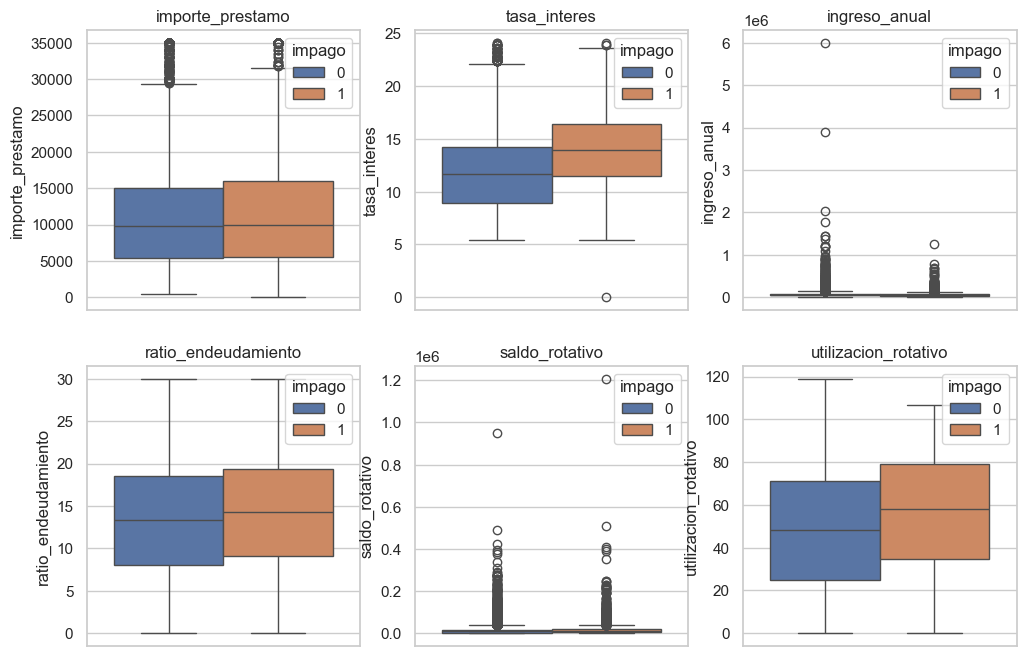

In [84]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

i = 0 

for fila in range(2):   
    for columna in range(3):
        sns.boxplot(data=df, y=numericas_continuas[i], ax=axes[fila][columna], hue="impago")
        axes[fila][columna].set_title(numericas_continuas[i])
        i += 1
plt.show()

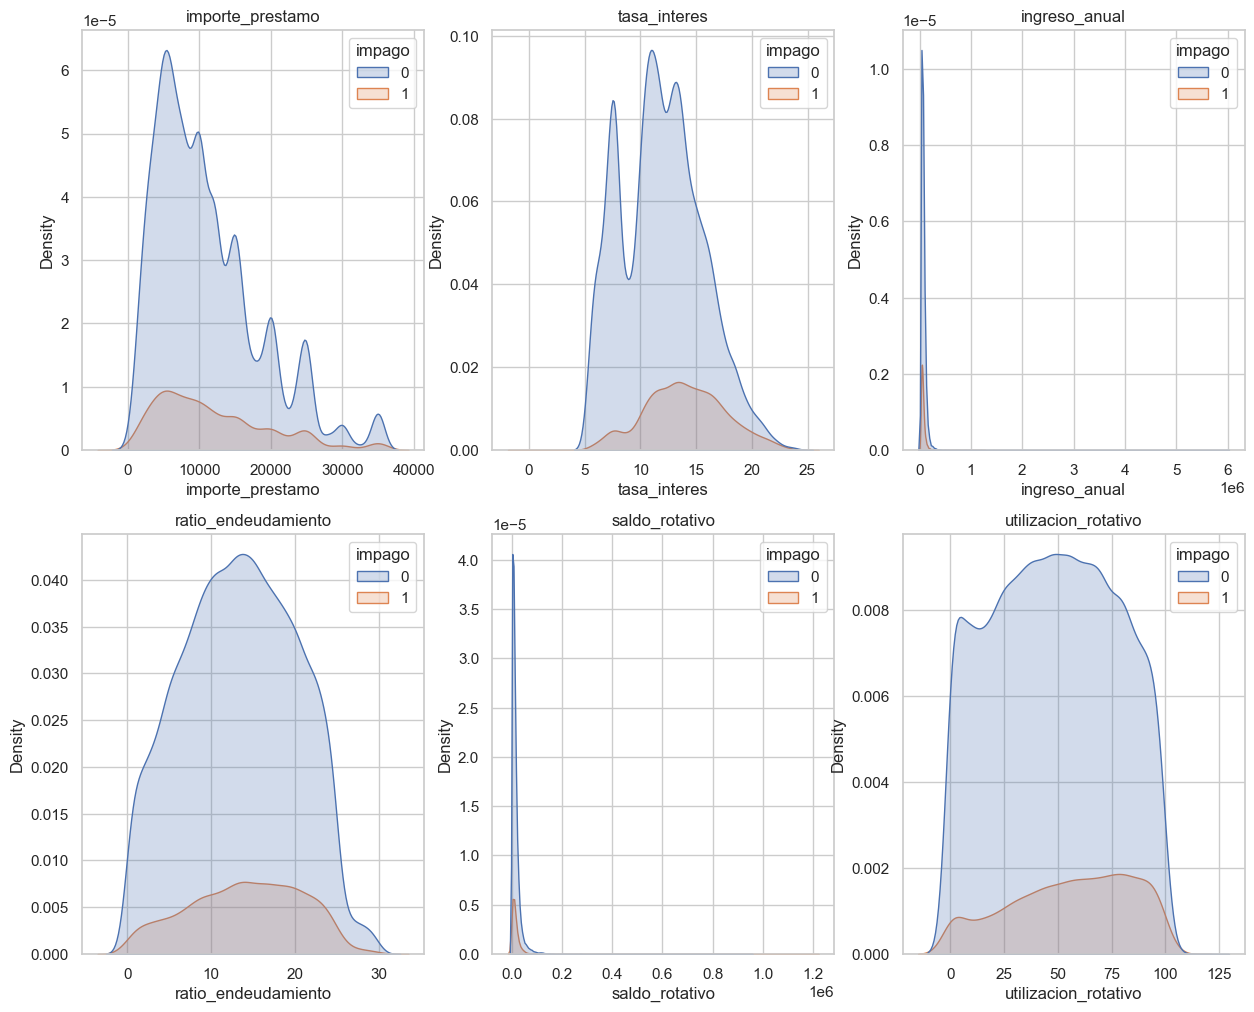

In [85]:
fig, axes = plt.subplots(2, 3, figsize=(15, 12))

i = 0 

for fila in range(2):
    for columna in range(3):
        sns.kdeplot(data=df, x=numericas_continuas[i], ax=axes[fila][columna], fill = True, hue="impago")
        axes[fila][columna].set_title(numericas_continuas[i])
        i += 1
plt.show()

Variables categóricas: observamos la frecuencia.

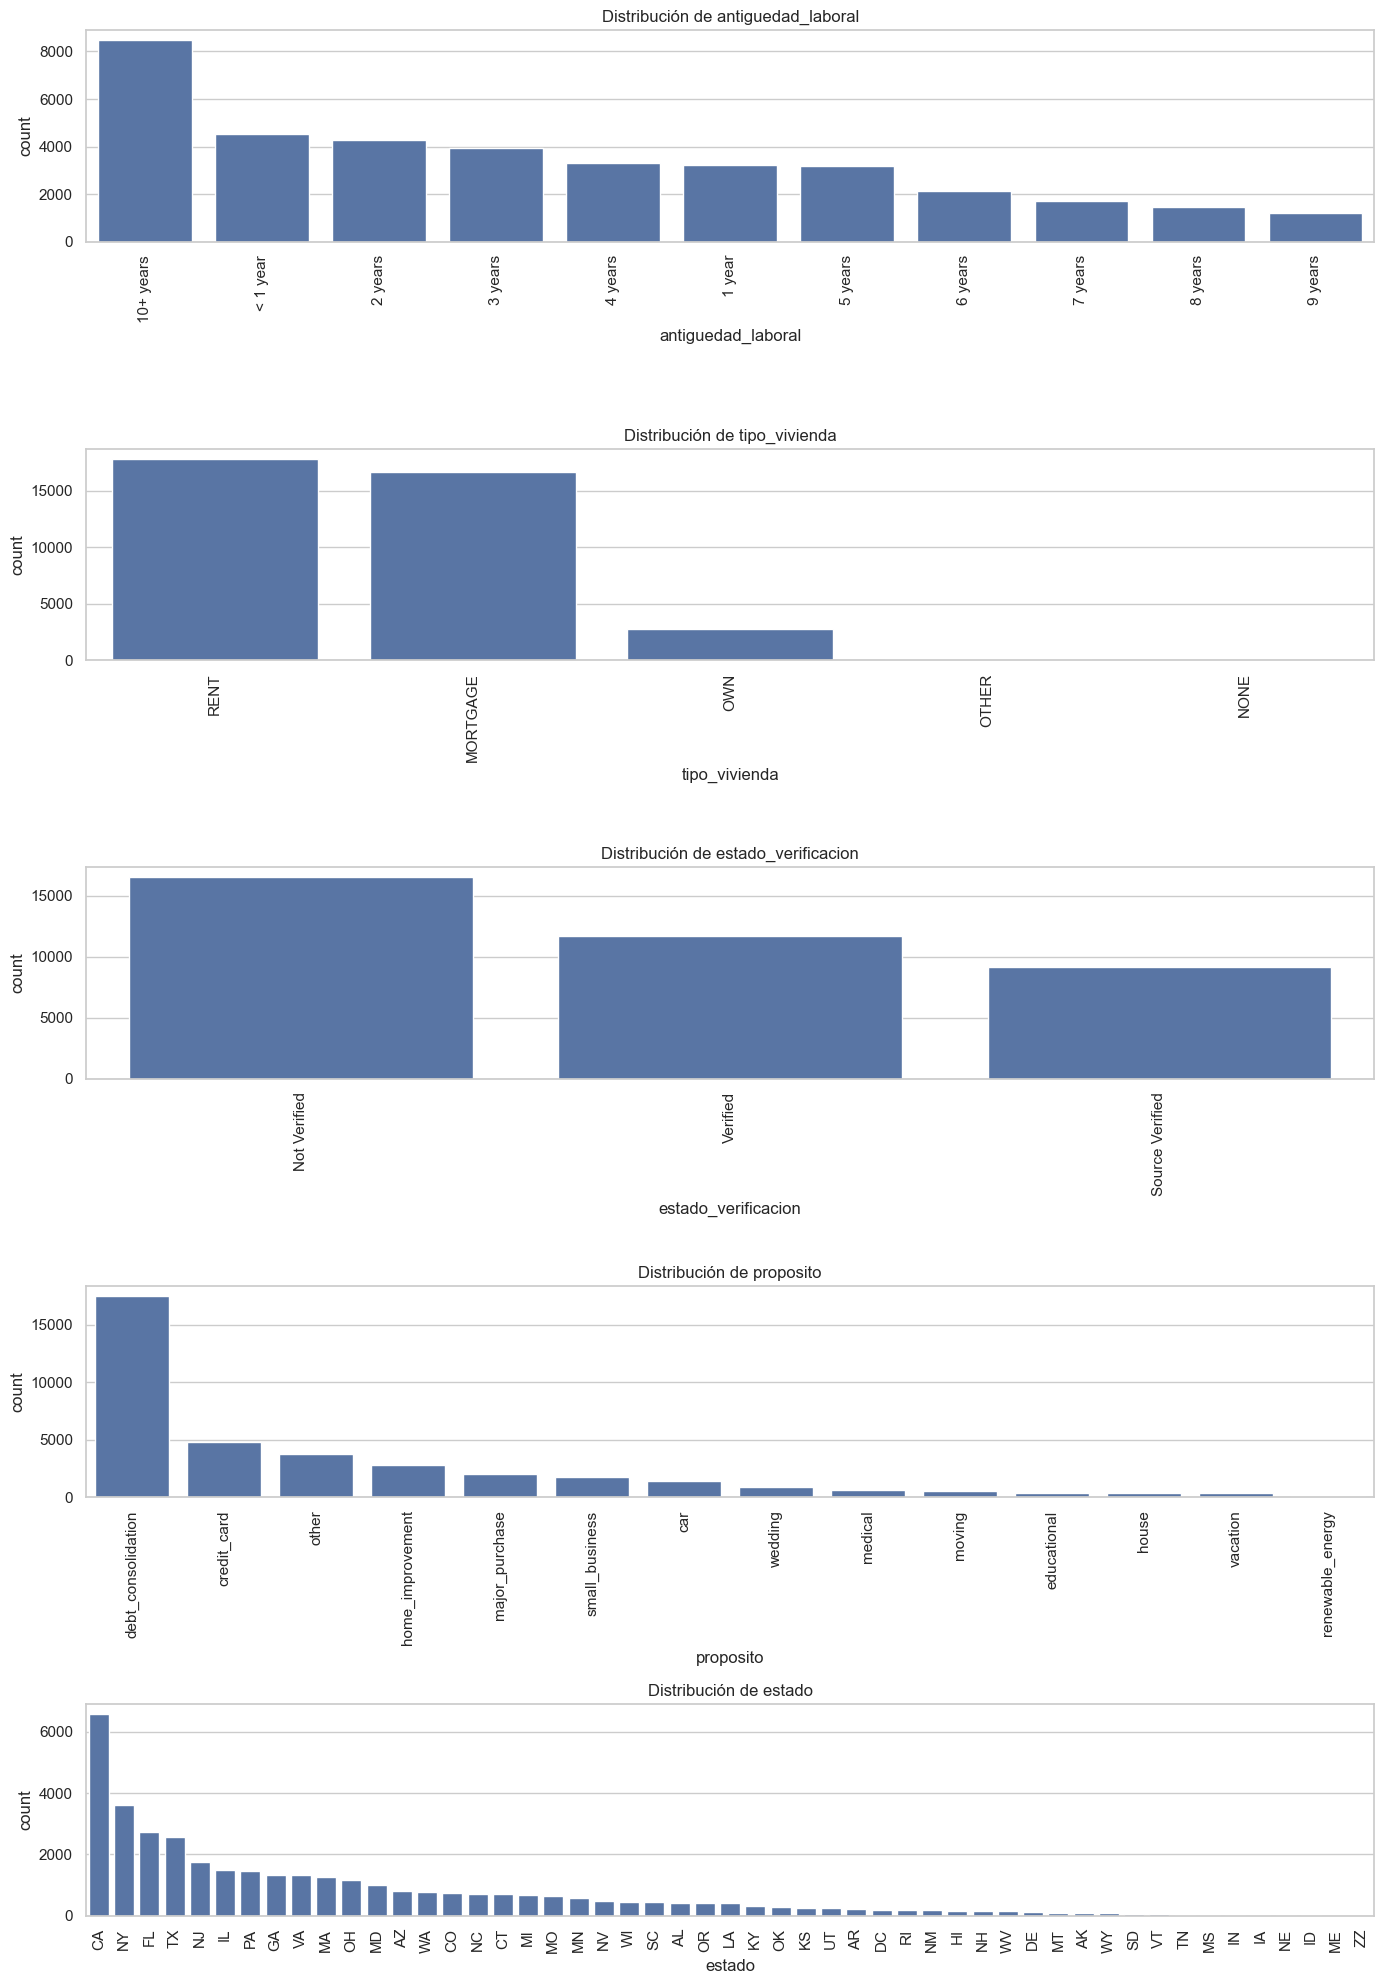

In [86]:
plt.figure(figsize=(14, 4 * len(categoricas)))

for i, col in enumerate(categoricas, 1):
    plt.subplot(len(categoricas), 1, i)
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



Realizamos conversiones de las variables categóricas para que sea mas sencillo trabajar con ellas

In [ ]:
# 1. Antigüedad: Conversión manual
mapa_antiguedad = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
# Convertimos la columna
df['antiguedad_laboral'] = df['antiguedad_laboral'].map(mapa_antiguedad)


# 2. Tipo de Vivienda: Limpiamos los residuales
df['tipo_vivienda'] = df['tipo_vivienda'].replace(['NONE', 'ANY'], 'OTHER')


 # 3. Propósito: Nos quedamos con el Top 5 y el resto a 'otros'
top_5_propositos = [
     'debt_consolidation', 
     'credit_card', 
     'other', 
     'home_improvement', 
     'major_purchase',
     'small_business'
 ]
def filtrar_proposito(valor):
     if valor in top_5_propositos:
         return valor
     else:
         return 'other'
df["proposito"] = df["proposito"].apply(filtrar_proposito)


In [123]:
df.head(5)

,importe_prestamo,plazo_meses,tasa_interes,antiguedad_laboral,tipo_vivienda,ingreso_anual,estado_verificacion,fecha_emision,proposito,estado,ratio_endeudamiento,moras_ultimos_2_anos,fecha_primera_linea_credito,consultas_6_meses,meses_desde_ultima_mora,cuentas_abiertas,registros_publicos,saldo_rotativo,utilizacion_rotativo,total_cuentas,impago,rango_ingreso,año_emision,fecha_emision_dt
0,0.0,36,0.00,NaN,RENT,0.0,Not Verified,1999-12-01,major_purchase,ZZ,0.00,0.0,2001-01-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,NaN,1999,1999-12-01
1,2500.0,36,13.98,NaN,RENT,20004.0,Not Verified,2010-07-01,other,MI,19.86,0.0,2005-08-01,5.0,0.0,7.0,0.0,981.0,21.3,10.0,0,20k-40k,2010,2010-07-01
2,5000.0,36,15.95,NaN,RENT,59000.0,Not Verified,2010-06-01,debt_consolidation,NY,19.57,0.0,1994-04-01,1.0,59.0,7.0,0.0,18773.0,99.9,15.0,1,40k-60k,2010,2010-06-01
3,7000.0,36,9.91,NaN,MORTGAGE,53796.0,Not Verified,2011-09-01,other,TX,10.80,3.0,1998-03-01,3.0,3.0,7.0,0.0,3269.0,47.2,20.0,0,40k-60k,2011,2011-09-01
4,2000.0,36,5.42,NaN,RENT,30000.0,Not Verified,2011-09-01,debt_consolidation,NY,3.60,0.0,1975-01-01,0.0,72.0,7.0,0.0,0.0,0.0,15.0,0,20k-40k,2011,2011-09-01


Análisis bivariante y correlaciones

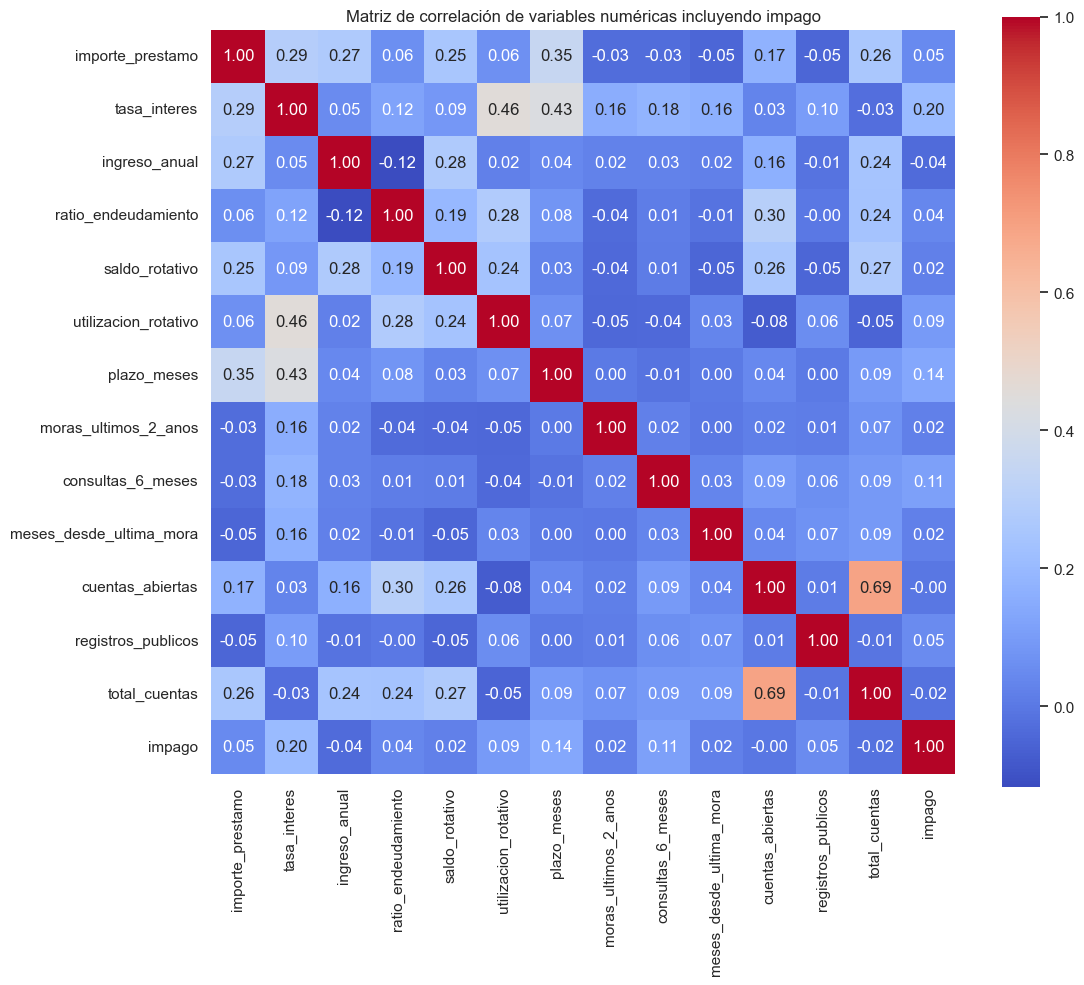

In [89]:
numericas = numericas_continuas + numericas_discretas

# Incluimos impago
corr_matrix_target = df[numericas + ["impago"]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_target, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de correlación de variables numéricas incluyendo impago")
plt.show()

In [90]:
top_corr = corr_matrix_target["impago"].sort_values(ascending=False).reset_index()

top_corr = top_corr[top_corr["index"] != "impago"]

top_corr

,index,impago
1,tasa_interes,0.202191
2,plazo_meses,0.135830
3,consultas_6_meses,0.111303
4,utilizacion_rotativo,0.094015
5,registros_publicos,0.051036
6,importe_prestamo,0.045724
7,ratio_endeudamiento,0.039722
8,meses_desde_ultima_mora,0.022159
9,saldo_rotativo,0.020308
10,moras_ultimos_2_anos,0.020133


Vemos que las correlaciones lineales son bajas, por lo que usar modelos de ML clásicos como regresiones lineales o logísticas tendrán mal rendimiento debido a la baja linealidad

Sin embargo, pearson captura solo relaciones lineales, y el riesgo de crédito rara vez es lineal.
Muchos patrones de impago aparecen por interacciones entre variables, no por efectos individuales

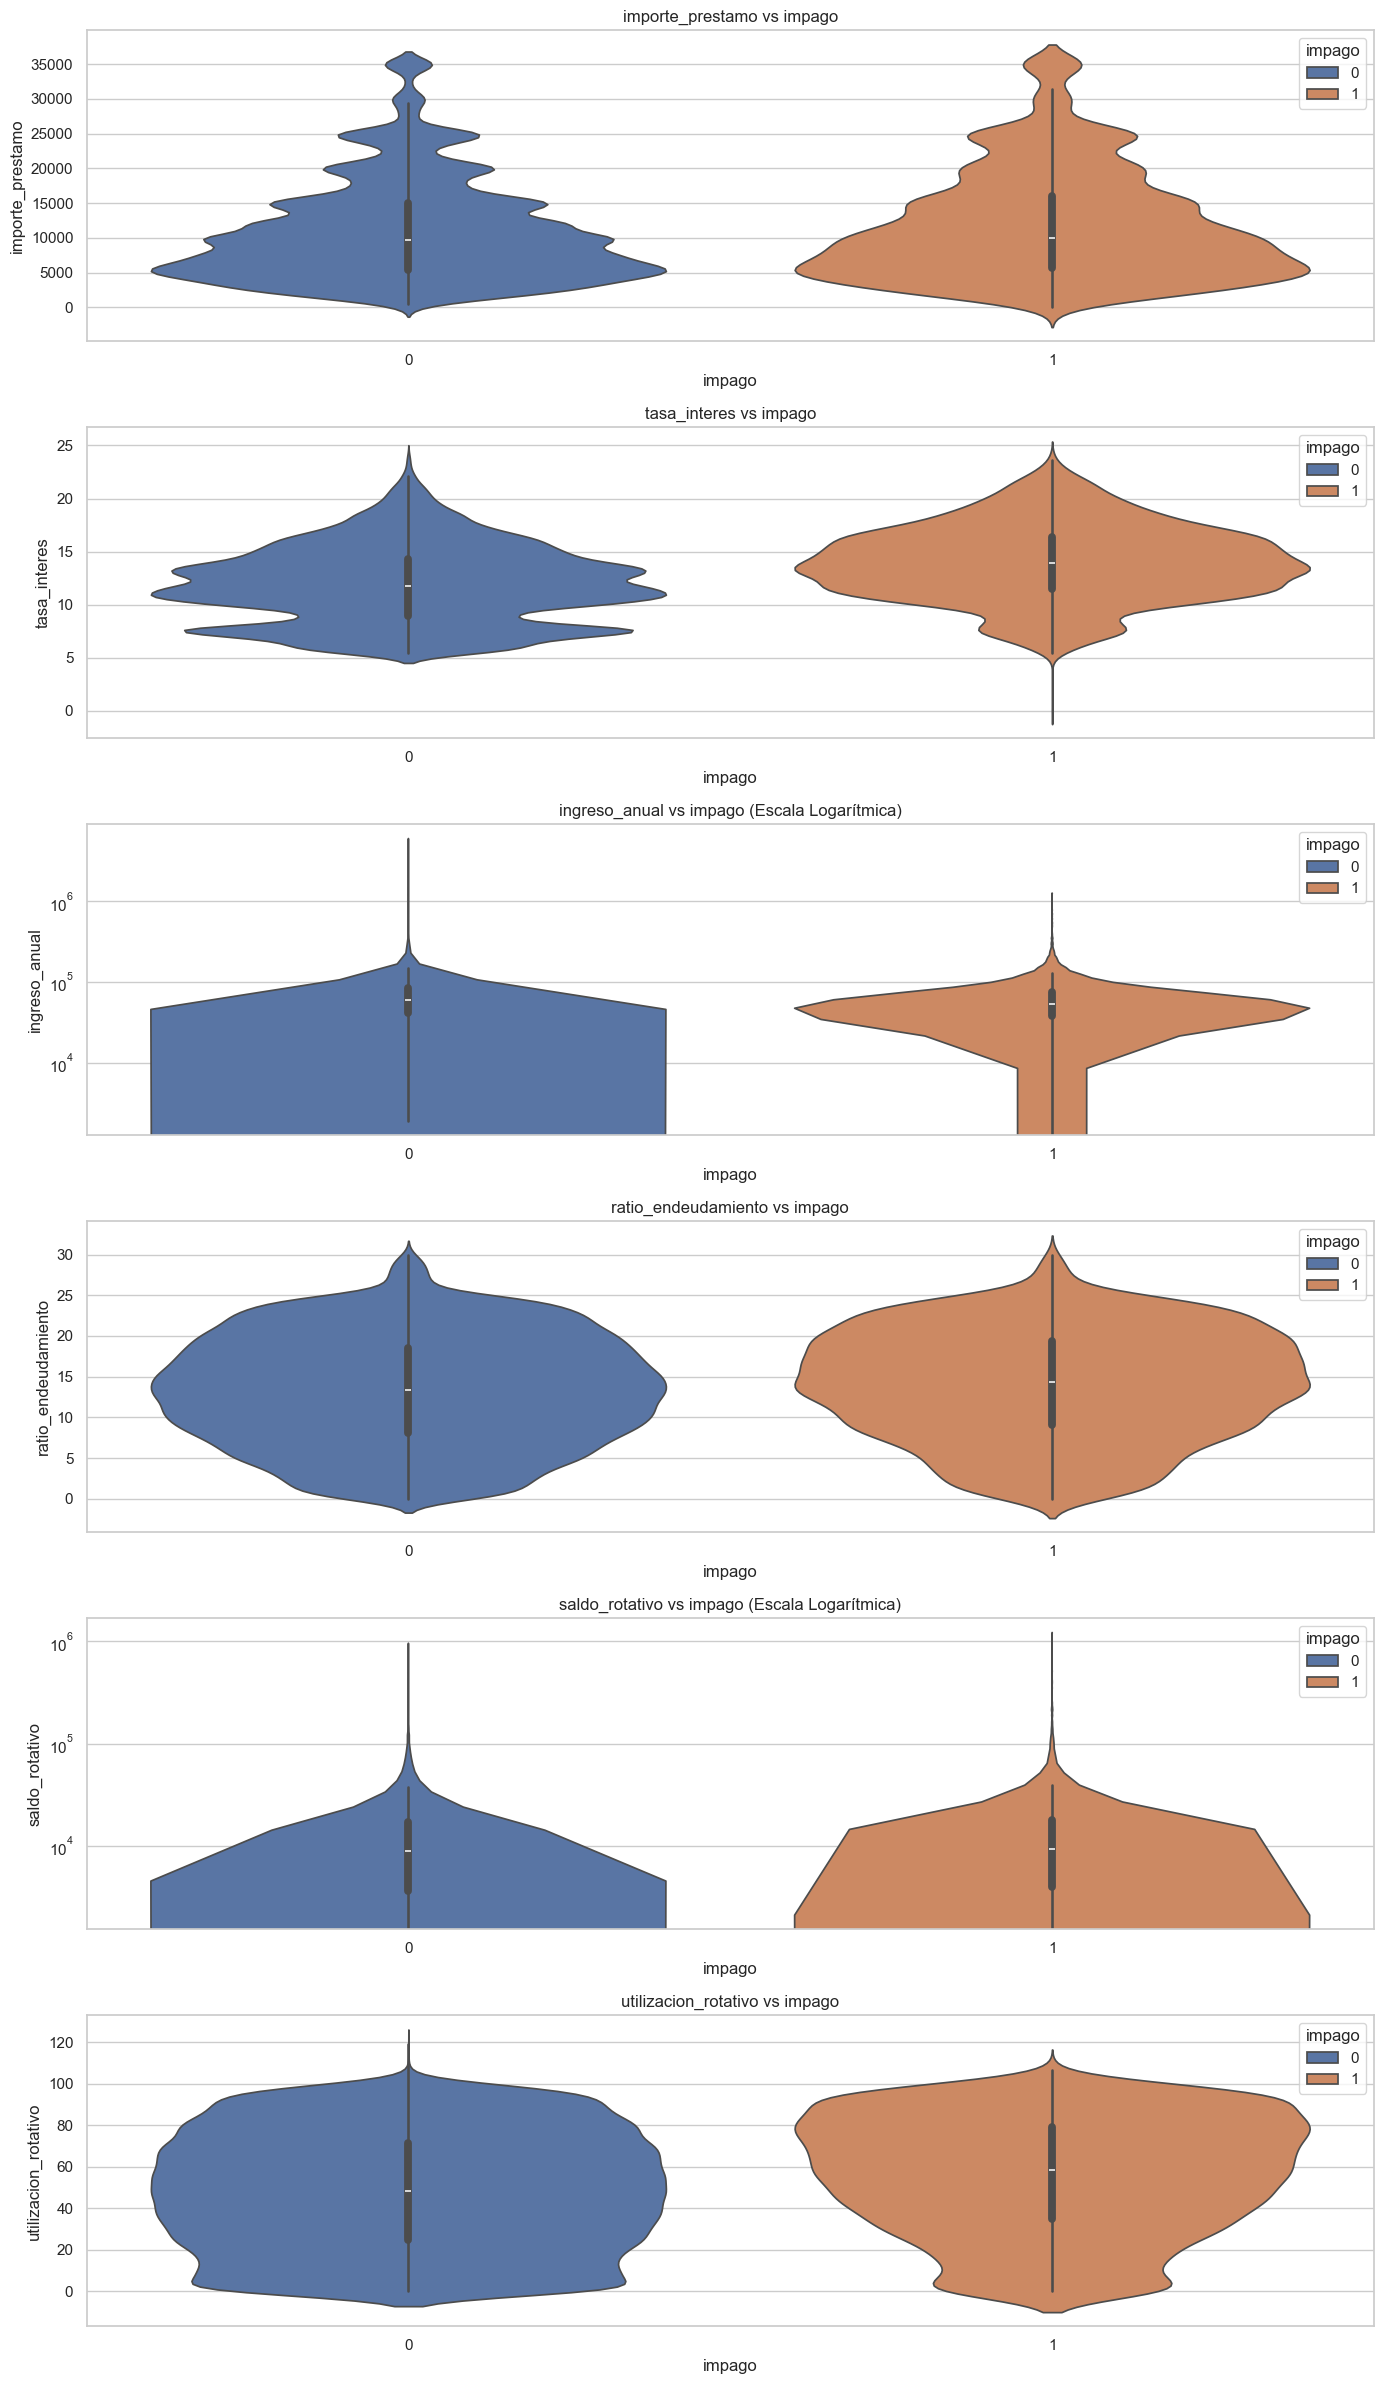

In [91]:
plt.figure(figsize=(14, 4 * len(numericas_continuas)))

for i, col in enumerate(numericas_continuas, 1):
    plt.subplot(len(numericas_continuas), 1, i)
    sns.violinplot(data=df, x=df["impago"], y=df[col], hue="impago")

    # Uso de escalas logarítmicas para las columnas muy grandes
    if col in ["ingreso_anual", "saldo_rotativo"]:
        plt.yscale("log")
        plt.title(f"{col} vs impago (Escala Logarítmica)")
    else:
        plt.title(f"{col} vs impago")
plt.tight_layout()
plt.show()

Los violines confirman lo que se vio en el heatmap: hay demasiado solapamiento entre pagadores y morosos, por lo que no existen diferenciadores lineales simples.

Sin embargo, las diferencias de forma en variables como tasa de interés demuestran que sí puede haber patrones, aunque estos no sean lineales. Esto justifica pasar de regresiones clásicas a modelos no lineales

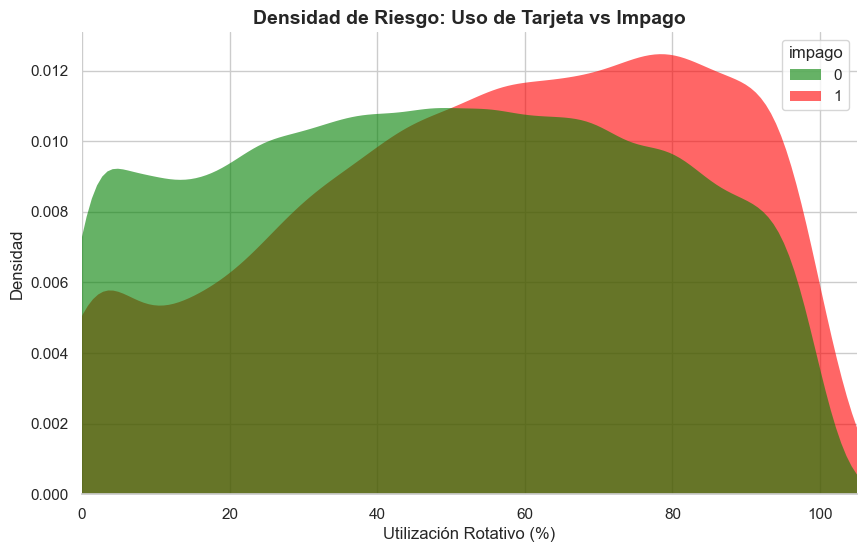

In [92]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Gráfico de densidad transparente
sns.kdeplot(
    data=df, 
    x="utilizacion_rotativo", 
    hue="impago", 
    fill=True, 
    common_norm=False, 
    palette=["green", "red"], 
    alpha=.6, 
    linewidth=0
)

plt.title("Densidad de Riesgo: Uso de Tarjeta vs Impago", fontsize=14, fontweight='bold')
plt.xlabel("Utilización Rotativo (%)")
plt.xlim(0, 105) 
plt.ylabel("Densidad")
sns.despine(left=True)
plt.show()

Los clientes con menor uso de rotativo son más propensos a devolver los préstamos. 

Por el contrario, los clientes con mayor uso de rotativo son menos propensos a devolverlo. Esto se puede deber a que usan el crédito del banco en sus gastos corrientes

C:\Users\anton\AppData\Local\Temp\ipykernel_27588\2624259319.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  impago_por_ingreso = df.groupby("rango_ingreso")["impago"].mean().reset_index()


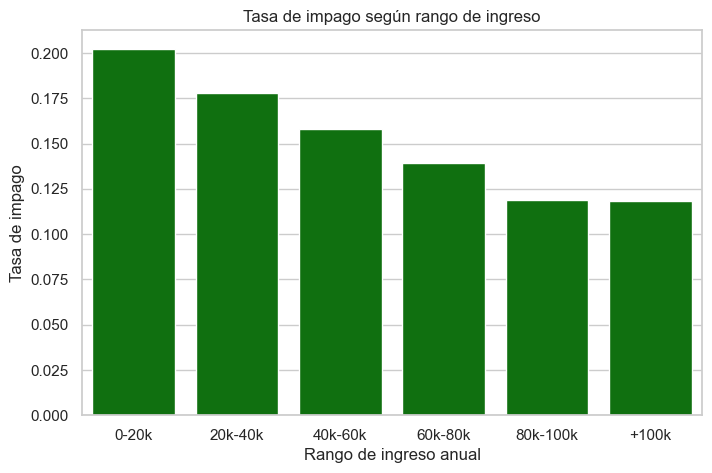

In [93]:
labels = ["0-20k", "20k-40k", "40k-60k", "60k-80k", "80k-100k", "+100k"]
df["rango_ingreso"] = pd.cut(df["ingreso_anual"], bins=[0, 20000, 40000, 60000, 80000, 100000, df["ingreso_anual"].max()], labels=labels)

impago_por_ingreso = df.groupby("rango_ingreso")["impago"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=impago_por_ingreso, x="rango_ingreso", y="impago", color="green")
plt.xlabel("Rango de ingreso anual")
plt.ylabel("Tasa de impago")
plt.title("Tasa de impago según rango de ingreso")
plt.show()


Observamos que a medida que aumenta el ingreso anual, la tasa de impago es menor, lo cual tiene sentido, pues la gente con mayor ingreso tiene más activo con el que pagar sus deudas.

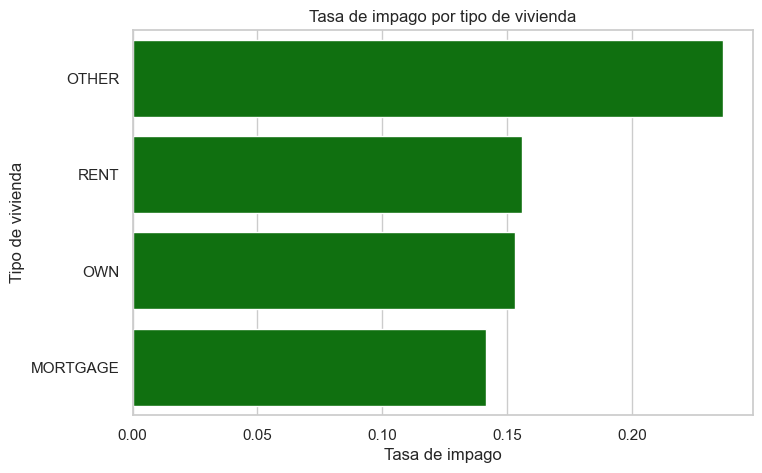

In [94]:
impago_por_vivienda = df.groupby("tipo_vivienda")["impago"].mean().reset_index().sort_values("impago", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=impago_por_vivienda, x="impago", y="tipo_vivienda", color="green")
plt.xlabel("Tasa de impago")
plt.ylabel("Tipo de vivienda")
plt.title("Tasa de impago por tipo de vivienda")
plt.show()


La tasa de impago mayor la tiene aquellos cuya situación de vivienda no entra en una de las 3 opciones más comunes (propia, hipotecada y alquilada).
Sorprende ver que aquellos con hipoteca tienen menor tasa de impago que aquellos que ya tienen la casa pagada, pues se supone que al no tener que pagar hipoteca esto significa que tendrían menos gastos respecto a un hipotecado y por tanto que tendrían más dinero para devolver los préstamos.

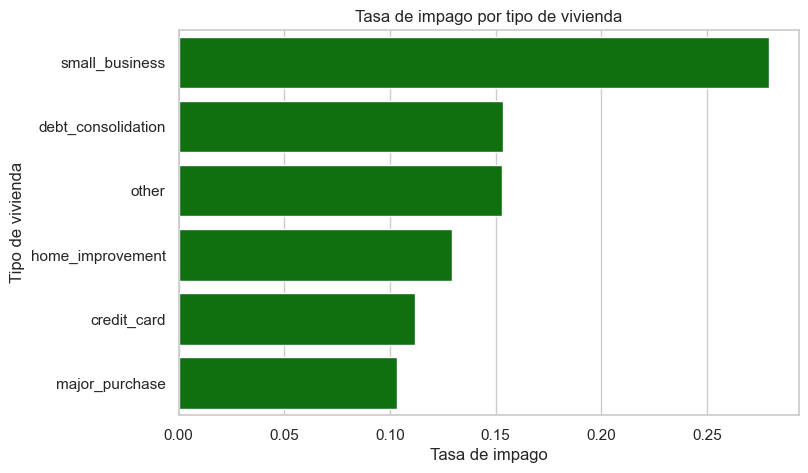

In [95]:
impago_por_proposito = df.groupby("proposito")["impago"].mean().reset_index().sort_values("impago", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=impago_por_proposito, x="impago", y="proposito", color="green")
plt.xlabel("Tasa de impago")
plt.ylabel("Tipo de vivienda")
plt.title("Tasa de impago por tipo de vivienda")
plt.show()


En cuanto al porcentaje de impago en base al propósito de la solicitud, los préstamos para pequeños negocios son los que más tasa de impago muestran, esto puede deberse a que montar un negocio siempre conlleva riesgo y muchas veces los proyectos no pueden llevarse a cabo y la empresa quiebra.
Por otra parte, el menor porcentaje de impago lo tienen aquellos préstamos que se conceden para compras mayores.

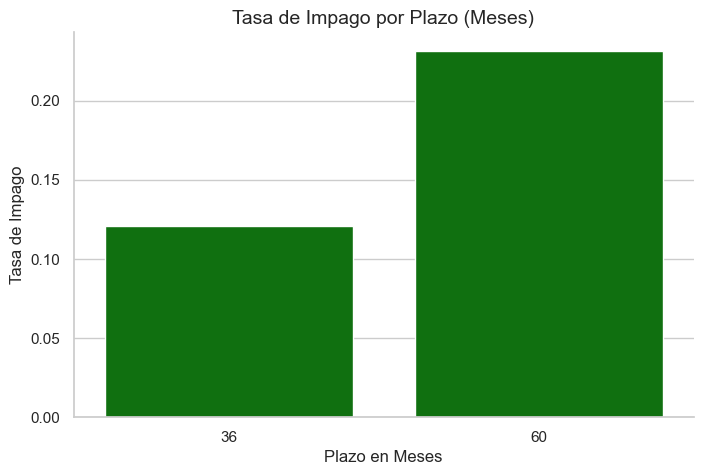

In [96]:
plt.figure(figsize=(8, 5))

# Comparamos el riesgo promedio directo entre los plazos disponibles (36 vs 60 meses)
sns.barplot(data=df, x="plazo_meses", y="impago", errorbar=None, color="green")

plt.title("Tasa de Impago por Plazo (Meses)", fontsize=14)
plt.ylabel("Tasa de Impago")
plt.xlabel("Plazo en Meses")
sns.despine()
plt.show()

Existe una relación directa y contundente entre la duración del préstamo y el riesgo. 
Los préstamos a 60 meses presentan prácticamente el doble de riesgo de impago (superior al 20%) en comparación con los de 36 meses (aproximadamente un 12%). 
Esto sugiere que a mayor horizonte temporal, mayor incertidumbre financiera para el prestatario

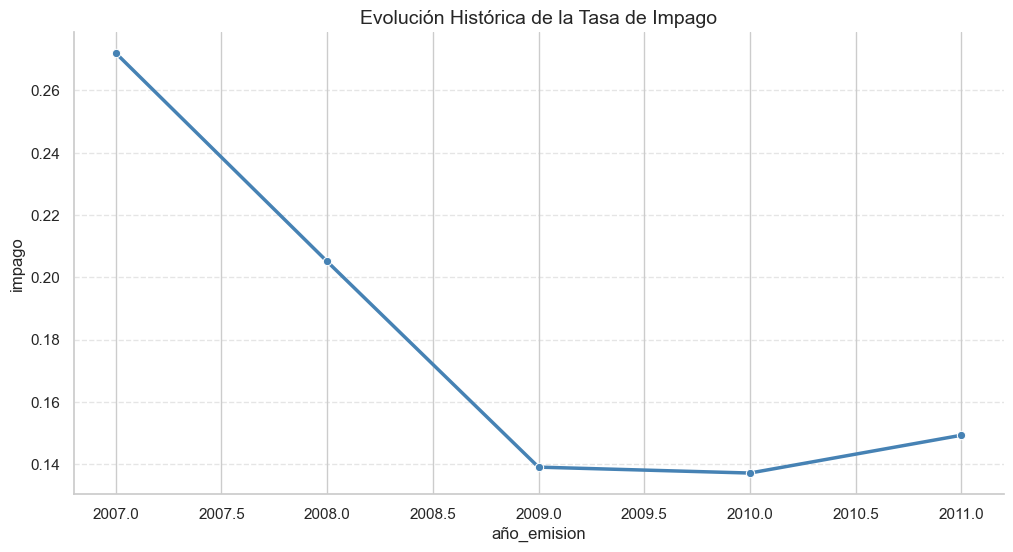

In [ ]:
plt.figure(figsize=(12, 6))
df["año_emision"] = pd.to_datetime(df["fecha_emision"]).dt.year

# Calculamos el volumen por año y filtramos aquellos con menos de 50 registros
conteo_años = df["año_emision"].value_counts()
años_validos = conteo_años[conteo_años >= 50].index
df_filtrado = df[df["año_emision"].isin(años_validos)]

# Graficamos usando solo los años con muestra suficiente
sns.lineplot(data=df_filtrado, x="año_emision", y="impago", marker="o", errorbar=None, color="steelblue", linewidth=2.5)

plt.title("Evolución Histórica de la Tasa de Impago", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.5)
sns.despine()
plt.show()

Como se puede observar en la gráfica, el riesgo de impago ha decaido fuertemente desde 2007 hasta 2009, reducienose a la mitad la probabilidad de impago.
Gracias a esta gráfica los bancos pueden concluir que el riesgo de impago por parte de los clientes ha decaido mucho, lo cual es beneficioso para su negocio debido a que este indicador aporta confianza.

Se han incluido solo los años con más de 50 registros para eliminar posibles outliers

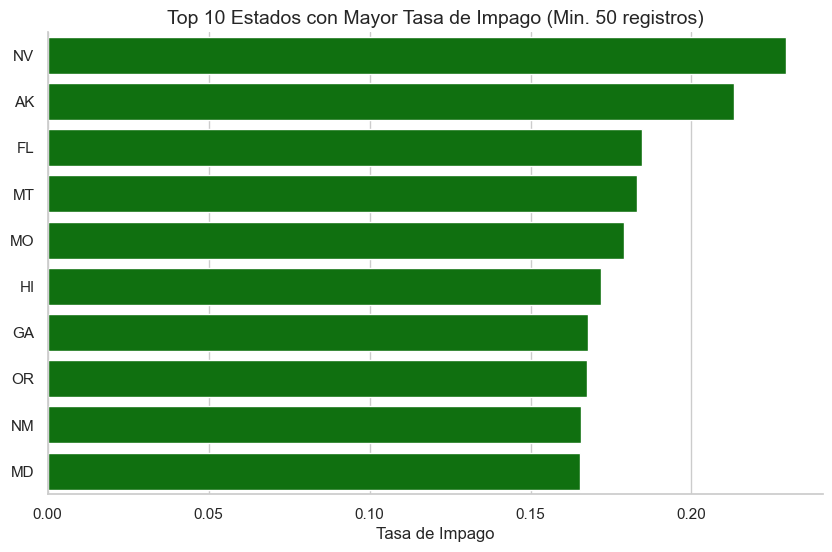

In [ ]:
plt.figure(figsize=(10, 6))

# Agrupamos para obtener media y cantidad, filtrando los estados con menos de 50 préstamos
stats_estado = df.groupby("estado")["impago"].agg(["mean", "count"])
estados_validos = stats_estado[stats_estado["count"] >= 50]

# Ordenamos por la media de impago y nos quedamos con los 10 peores
riesgo_estado = estados_validos.sort_values(by="mean", ascending=False).head(10).reset_index()

sns.barplot(data=riesgo_estado, x="mean", y="estado", color="green")

plt.title("Top 10 Estados con Mayor Tasa de Impago (Min. 50 registros)", fontsize=14)
plt.xlabel("Tasa de Impago")
plt.ylabel("")
sns.despine()
plt.show()

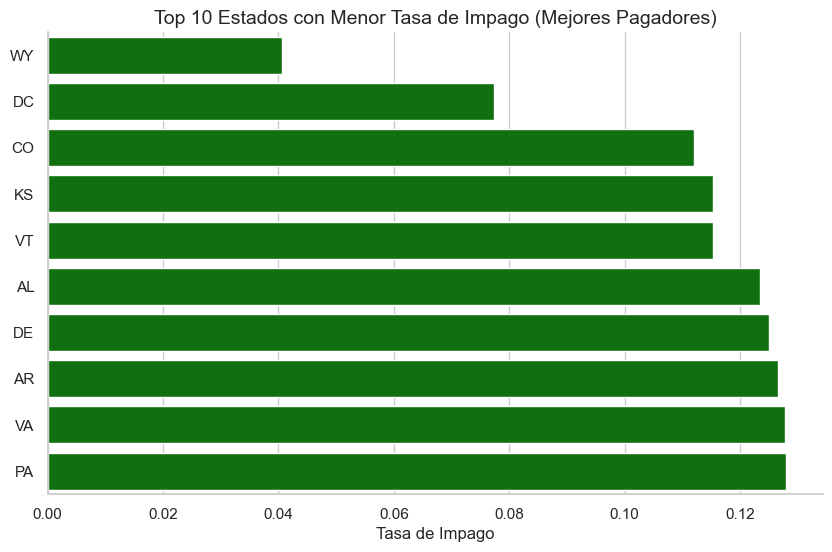

In [119]:
plt.figure(figsize=(10, 6))

# Agrupamos para obtener media y cantidad, filtrando los estados con menos de 50 préstamos
stats_estado = df.groupby("estado")["impago"].agg(["mean", "count"])
estados_validos = stats_estado[stats_estado["count"] >= 50]

# CAMBIO AQUÍ: Ordenamos ascendente (de menor a mayor impago) para ver los mejores
mejores_estados = estados_validos.sort_values(by="mean", ascending=True).head(10).reset_index()

sns.barplot(data=mejores_estados, x="mean", y="estado", color="green")

plt.title("Top 10 Estados con Menor Tasa de Impago (Mejores Pagadores)", fontsize=14)
plt.xlabel("Tasa de Impago")
plt.ylabel("")
sns.despine()
plt.show()

Nevada y FLorida son estados que encabezan la lista de estados representativos con más riesgo de impago. Estos a su vez (junto con Arizona y California) forman el epicentro de la crisis financiera del 2008 y el colapso de la vivienda

Por otra parte, estados más estables durante la época como Wayoming o Colorado no tuvieron tanto riesgo de imapgo, debido a la mejor situación económica y estabilidad financiera de los mismos

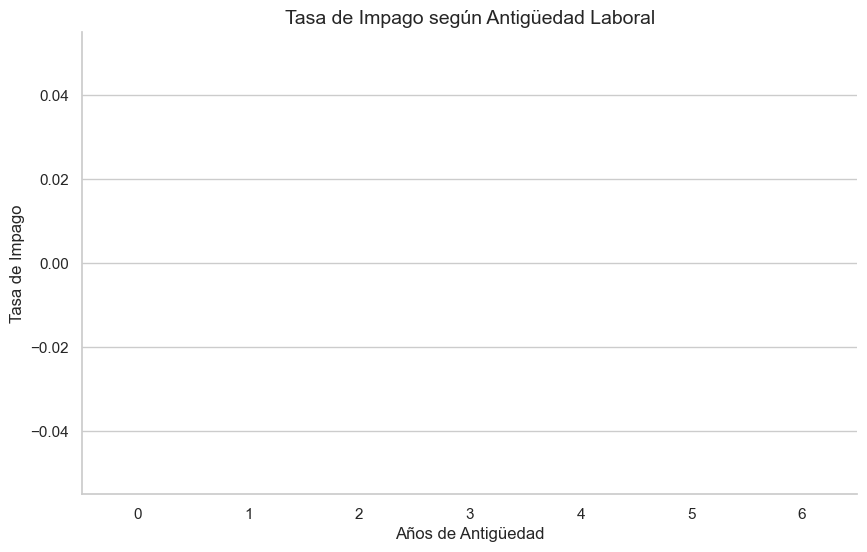

In [129]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="antiguedad_laboral", y="impago", color="green")

plt.title("Tasa de Impago según Antigüedad Laboral", fontsize=14)
plt.xlabel("Años de Antigüedad")
plt.ylabel("Tasa de Impago")
sns.despine()
plt.show()